In [470]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # 데이터 스플릿용
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀분석모델 사용
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [471]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [472]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [473]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [474]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [475]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [476]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [477]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

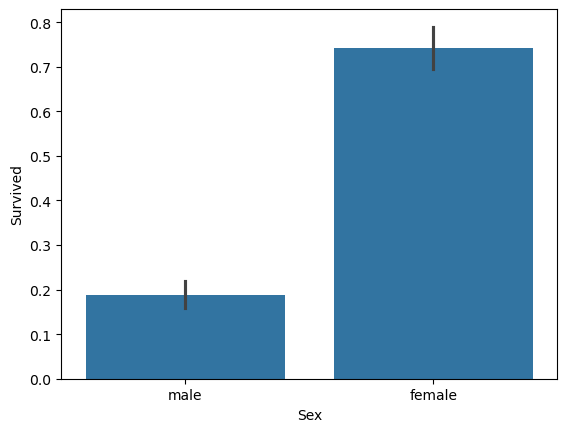

In [478]:
sns.barplot(x="Sex", y="Survived", data=train)

<Axes: xlabel='Pclass', ylabel='Survived'>

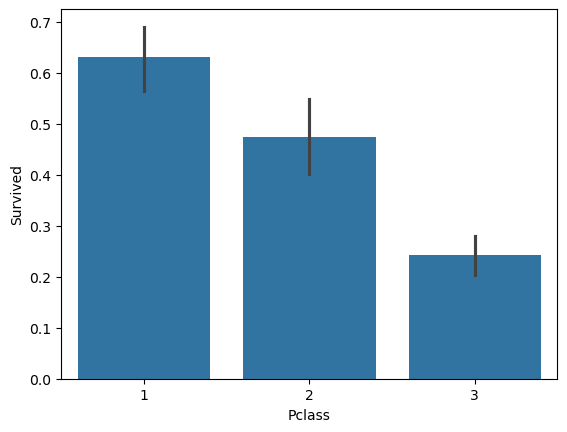

In [479]:
sns.barplot(x="Pclass", y="Survived", data=train)

<Axes: xlabel='Age', ylabel='Count'>

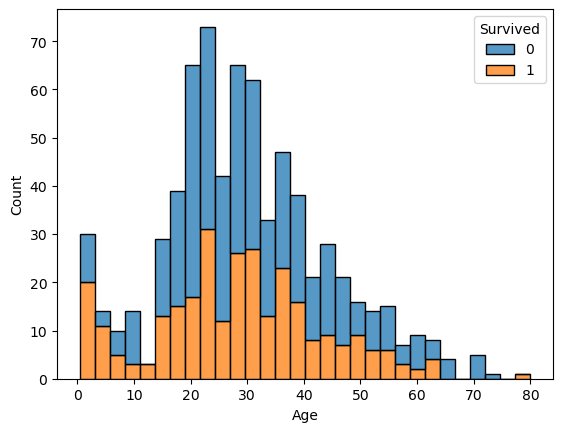

In [480]:
sns.histplot(data=train, x="Age", hue="Survived", multiple="stack", bins=30)

<Axes: xlabel='FamilySize', ylabel='Survived'>

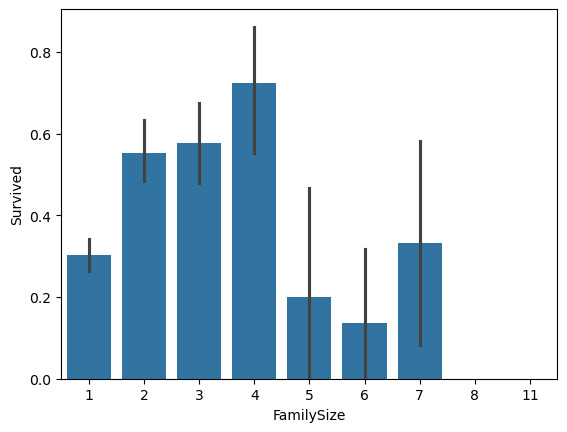

In [481]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=train)

<Axes: >

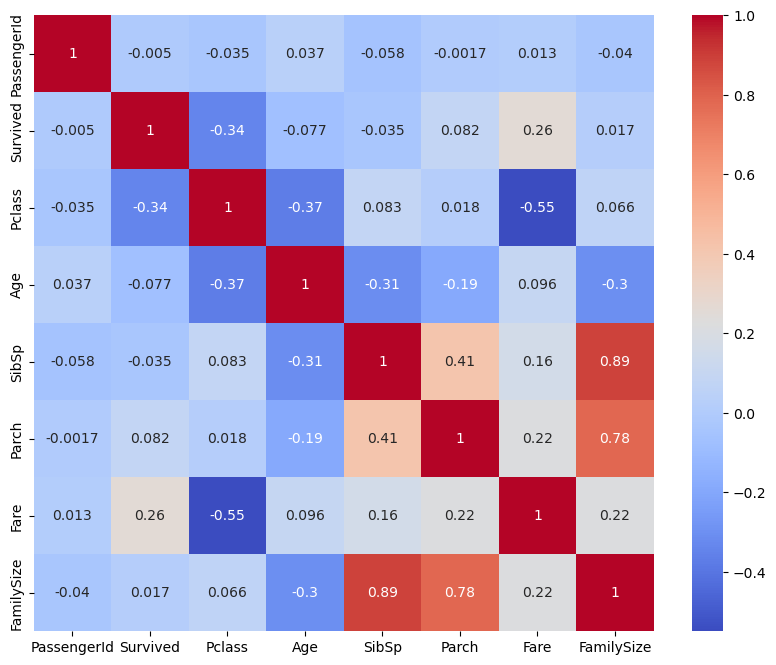

In [482]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [483]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [484]:
train = train.drop(columns= ['Name', 'Ticket', 'Cabin','Embarked'])
train['Sex'] = train['Sex'].map({'male':0,'female':1}) # Sex 열 > 0,1로 매핑

y = train['Survived']

corr = train.corr()['Survived'].abs().sort_values(ascending=False) # corr에다가 Survived와 상관계수의 절대값이 높은 순서대로(내림차순) 정렬
print(corr) # 각각의 상관계수 확인
best = corr.index[1:] # 0은 Survived니까 빼고
best

Survived       1.000000
Sex            0.543351
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
FamilySize     0.016639
PassengerId    0.005007
Name: Survived, dtype: float64


Index(['Sex', 'Pclass', 'Fare', 'Parch', 'Age', 'SibSp', 'FamilySize',
       'PassengerId'],
      dtype='object')

In [485]:
X = train[best]
print(X, X.isnull().sum())

     Sex  Pclass     Fare  Parch   Age  SibSp  FamilySize  PassengerId
0      0       3   7.2500      0  22.0      1           2            1
1      1       1  71.2833      0  38.0      1           2            2
2      1       3   7.9250      0  26.0      0           1            3
3      1       1  53.1000      0  35.0      1           2            4
4      0       3   8.0500      0  35.0      0           1            5
..   ...     ...      ...    ...   ...    ...         ...          ...
886    0       2  13.0000      0  27.0      0           1          887
887    1       1  30.0000      0  19.0      0           1          888
888    1       3  23.4500      2   NaN      1           4          889
889    0       1  30.0000      0  26.0      0           1          890
890    0       3   7.7500      0  32.0      0           1          891

[891 rows x 8 columns] Sex              0
Pclass           0
Fare             0
Parch            0
Age            177
SibSp            0
FamilySize

In [486]:
X = X.copy()

# NaN 처리
mean_age = X['Age'].mean()
X['Age'] = X['Age'].fillna(mean_age)

In [487]:
# X, y 분할
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
S_model = LogisticRegression(max_iter=1000)
S_model.fit(train_X, train_y)

# 테스트 및 정확도확인
predict_y = S_model.predict(test_X)
accuracy = accuracy_score(test_y, predict_y)
print(f"Logistic Regression Model's Accuracy : {accuracy:.4f}")

Logistic Regression Model's Accuracy : 0.8101


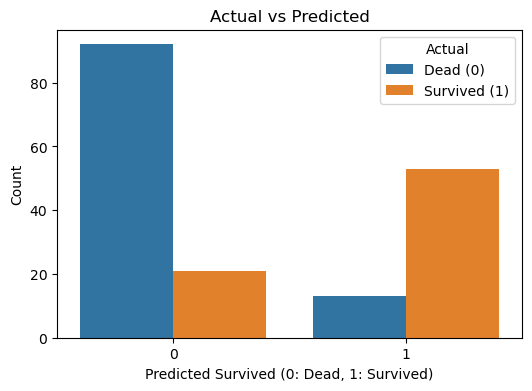

Accuracy : 0.8101


In [488]:
# 예측 결과 DataFrame 생성
df_results = pd.DataFrame({'Actual': test_y, 'Predicted': predict_y})

# countplot 시각화
plt.figure(figsize=(6, 4))
sns.countplot(x='Predicted', hue='Actual', data=df_results)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted Survived (0: Dead, 1: Survived)')
plt.ylabel('Count')
plt.legend(title="Actual", labels=["Dead (0)", "Survived (1)"])
plt.show()
print(f"Accuracy : {accuracy:.4f}")

In [489]:
# 평가
pred_y = S_model.predict(test_X)
acc = accuracy_score(test_y, pred_y)

# 출력
print(f"\n✅ Logistic Regression 정확도: {acc:.4f}")
print("\n📊 Classification Report:")
print(classification_report(test_y, pred_y))


✅ Logistic Regression 정확도: 0.8101

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [490]:
# 실제 test 데이터 준비 (PassengerId 필요)
# test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df = pd.read_csv('test.csv')
test_ids = test_df['PassengerId']

# 전처리 (학습 때와 동일하게)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_df['Age'] = test_df['Age'].fillna(X['Age'].mean())  # 학습 데이터 기준 평균 사용
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

# 사용한 피처만 선택 (X.columns 그대로 사용)
test_X = test_df[X.columns]

# 예측
submission_preds = S_model.predict(test_X)

# 제출 파일 생성
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': submission_preds
})
# submission.to_csv('/kaggle/working/submission.csv', index=False)
submission.to_csv('submission.csv', index=False)
print("submission.csv 저장 완료!")

submission.csv 저장 완료!
